In [5]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

# Reading csv 
respiratory = pd.read_csv('respiratory.csv')
respiratory.head()

,Age,Rate
0,0.1,53
1,0.2,38
2,0.3,58
3,0.3,52
4,0.3,42


In [6]:
lm_md = smf.ols(formula = 'Rate ~ Age', data = respiratory).fit()
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     560.9
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.17e-88
Time:                        10:09:46   Log-Likelihood:                -2148.7
No. Observations:                 618   AIC:                             4301.
Df Residuals:                     616   BIC:                             4310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.0522      0.504     93.317      0.000      46.062      48.042
Age           -0.6957      0.029    -23.684      0.000      -0.753      -0.638
==============================================================================
Omnibus:                       45.826   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.994
Skew:                           0.618   Prob(JB):                     1.55e-13
Kurtosis:                       3.873   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Checking for linearity 
respiratory['residuals'] = respiratory['Rate'] - lm_md.fittedvalues
respiratory.head()

,Age,Rate,residuals
0,0.1,53,6.017408
1,0.2,38,-8.913021
2,0.3,58,11.156551
3,0.3,52,5.156551
4,0.3,42,-4.843449


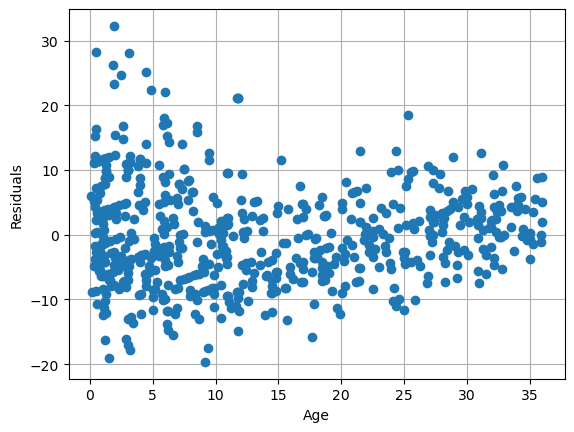

In [9]:
plt.plot('Age', 'residuals', 'o', data = respiratory)
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.grid();

In [10]:
# There is pattern in the residuals plot, so linearity assumption is not met.

In [11]:
respiratory['log_Rate'] = np.log(respiratory['Rate'])
respiratory.head()

,Age,Rate,residuals,log_Rate
0,0.1,53,6.017408,3.970292
1,0.2,38,-8.913021,3.637586
2,0.3,58,11.156551,4.060443
3,0.3,52,5.156551,3.951244
4,0.3,42,-4.843449,3.737670


In [12]:
lm_md_log = smf.ols(formula = 'log_Rate ~ Age', data = respiratory).fit()
lm_md_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_Rate   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     667.6
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          2.74e-100
Time:                        10:13:18   Log-Likelihood:                 129.96
No. Observations:                 618   AIC:                            -255.9
Df Residuals:                     616   BIC:                            -247.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8451      0.013    304.500      0.000       3.820       3.870
Age           -0.0190      0.001    -25.839      0.000      -0.020      -0.018
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.242
Skew:                          -0.030   Prob(JB):                        0.886
Kurtosis:                       2.924   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
new_obs = pd.DataFrame({'Age': [5]})
new_obs

,Age
0,5


In [15]:
np.exp(lm_md_log.predict(new_obs))

0    42.524218
dtype: float64